# Regressão Linear com o Tensorflow

## Objetivos

Os objetivos deste notebook são:
* apresentar a programação com o tensorflow
* 


## Importações

In [23]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

%matplotlib inline

# Common imports
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import numpy.random as rnd
import tensorflow as tf

from sklearn.datasets import load_iris

from show_graph import show_graph

# to make this notebook's output stable across runs
rnd.seed(42)


## Tensorflow

In [28]:
tf.reset_default_graph()

x = tf.Variable(3.0, name="x")
y = tf.Variable(4., name="y")
a = tf.constant(2.)

f = x*x*y + (y + a)

f

<tf.Tensor 'add_1:0' shape=() dtype=float32>

![](../figures/tf_graph.png)

In [29]:
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
zz = sess.run(f)
sess.close()

print(zz)


42.0


In [30]:
show_graph(tf.get_default_graph())

## Dataset

In [4]:
iris = load_iris()
print('iris.data:         ',iris.data.shape,iris.data.dtype,iris.data.min(),iris.data.max())
print('iris.target:       ', iris.target.shape,iris.target.dtype,iris.target.min(),iris.target.max())
print('iris.features_name:', iris.feature_names)
print('iris.target_names: ', iris.target_names)
print()

iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['target'] = iris.target
iris_pd.head()


iris.data:          (150, 4) float64 0.1 7.9
iris.target:        (150,) int64 0 2
iris.features_name: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris.target_names:  ['setosa' 'versicolor' 'virginica']



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Xb.shape: (50, 2) float64
yb.shape: (50, 1) float64


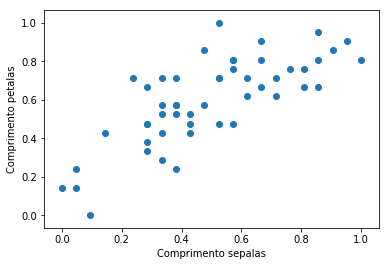

In [5]:
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x = data[:,0]
y = data[:,1]

x -= x.min()
x /= x.max()    # normalização
y -= y.min()
y /= y.max()

# print('x:', x)
# print('y:', y)

x_ = x.reshape(50,1)
yb = y.reshape(50,1)

n_samples = yb.shape[0]

# Montagem da matriz X agora com os elementos 1 na primeira coluna
Xb = np.hstack([np.ones(shape=(n_samples,1)), x_.reshape(n_samples,1)])

n_features = Xb.shape[1]

print('Xb.shape:',Xb.shape, Xb.dtype)
print('yb.shape:',yb.shape, yb.dtype)

plt.scatter(x, y)
plt.xlabel('Comprimento sepalas')
plt.ylabel('Comprimento petalas')
plt.show()

## Gradiente descendente

In [18]:
tf.reset_default_graph()

n_epochs = 100
learning_rate = 0.1

X = tf.constant(Xb, dtype=tf.float32, name="X")
y = tf.constant(yb, dtype=tf.float32, name="y")

# W = tf.Variable(tf.random_uniform([n_features, 1], -1.0, 1.0, seed=42), name="W")
W = tf.Variable(np.zeros((n_features, 1), np.float32), name="W")

y_pred = tf.matmul(X, W, name="predictions")
error = y_pred - y

mse = tf.reduce_mean(tf.square(error), name="mse")

# gradients = tf.gradients(mse, [W])[0]
gradients = 2/n_samples * tf.matmul(tf.transpose(X), error)

training_op = tf.assign(W, W - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 10 == 0:
            print("Epoch", epoch, "MSE =", mse.eval(), np.square(error.eval()).mean())
        sess.run(training_op)
    
    print("Epoch", epoch, "MSE =", mse.eval())
    best_theta = W.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 0.40907 0.40907
Epoch 10 MSE = 0.0316768 0.0316768
Epoch 20 MSE = 0.0289063 0.0289063
Epoch 30 MSE = 0.0275675 0.0275675
Epoch 40 MSE = 0.0264628 0.0264628
Epoch 50 MSE = 0.0255488 0.0255488
Epoch 60 MSE = 0.0247927 0.0247927
Epoch 70 MSE = 0.0241671 0.0241671
Epoch 80 MSE = 0.0236495 0.0236495
Epoch 90 MSE = 0.0232213 0.0232213
Epoch 99 MSE = 0.022867
Best theta:
[[ 0.3485736 ]
 [ 0.51798731]]


## Visualização do grafo

In [7]:
show_graph(tf.get_default_graph())